## 통계적 분석

- 상관관계가 큰 변수 찾기
- 결측치 처리
- 이상치 처리
- 로그 변환

### 데이터 (주택가격 예측 데이터)
- 아래 캐글 데이터를 다운받아 'data/house_data'폴더에 저장한다.
  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- https://medium.com/mighty-data-science-bootcamp/eda-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%84%A4%EB%AA%85%EC%84%9C%EC%97%90%EC%84%9C-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0-230060b9fc17

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [97]:
df_train = pd.read_csv('/content/sample_data/house_train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.shape

(1460, 81)

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 특성값 설명
- SalePrice - the property's sale price in dollars (target variable)
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [10]:
df_train.shape

(1460, 81)

### Target (목적변수) 의 특성 파악

In [11]:
# 목적 변수의 통계적 특성
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([ 5.,  0.,  5.,  6.,  6.,  7., 32., 29., 23., 35., 59., 67., 73.,
        92., 89., 91., 62., 60., 57., 73., 67., 54., 45., 33., 30., 31.,
        31., 33., 26., 23., 17., 19., 18., 18., 14., 11.,  5.,  8., 13.,
        12., 10.,  6.,  6.,  5.,  1.,  3.,  5.,  6.,  5.,  4.,  3.,  2.,
         3.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

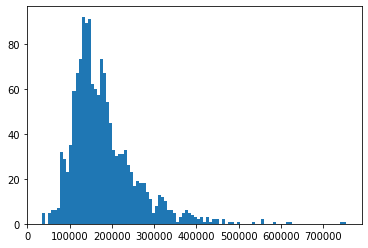

In [12]:
# 히스토그램
plt.hist(df_train['SalePrice'], bins=100)

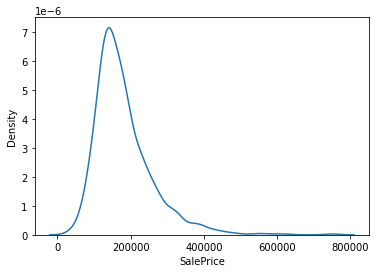

In [13]:
sns.kdeplot(df_train['SalePrice'])

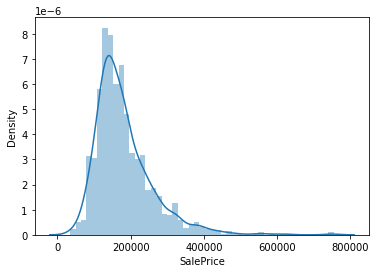

In [14]:
# 히스토그램
# sns.distplot(): This function combines the matplotlib hist function (with automatic 
# calculation of a good default bin size) with the seaborn kdeplot() and rugplot() 
# functions. It can also fit scipy.stats distributions and plot the estimated PDF 
# over the data.
# Flexibly plot a univariate distribution of observations. 
# y-axis is density rather than  count.
sns.distplot(df_train['SalePrice'], kde=True); # kde - kernel density estimation

#### 다음과 같은 특성을 발견할 수 있다.

- Deviate from the normal distribution
- Have appreciable positive skewness
- Show peakedness

- 첨도: 뾰족한 정도가 표준정규뷴포와 같으며, 0 보다 크면 그보다 더 뾰족함.
  (관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용)
  첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 
  정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 첨도값이 3보다 큰 
  양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다

In [15]:
#skewness and kurtosis (kurto'sis)
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())          # old-type
print("Kurtosis: {:f}".format(df_train['SalePrice'].kurt()))  # string format()

Skewness: 1.882876
Kurtosis: 6.536282
Kurtosis: 6.536282


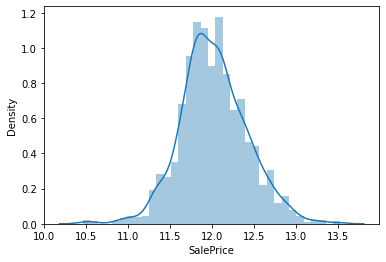

In [16]:
sns.distplot(np.log(df_train['SalePrice']), kde=True)  # log-normal dist

### 어떤 변수들이 목적변수와 연관성이 높은가? 
- 변수들간의 상관 관계는 correlation (상관관계) 을 보면 알 수 있다. 
- 상관관계를 보기 전에 먼저 target 과 특정 변수와의 관계를 보고 싶다면...

In [17]:
# 산포도를 통해 grlivarea 와 saleprice 의 관계를 보자
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


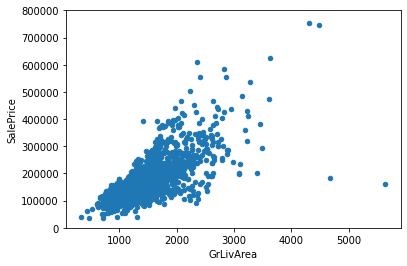

In [18]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [19]:
# plt.scatter 로도 그릴 수 있다.
# data[var].shape, data.SalePrice.shape
# plt.scatter(data[var], data.SalePrice);

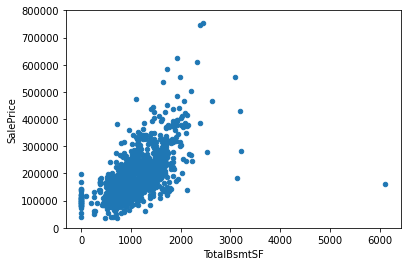

In [20]:
# scatter plot for totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### 카테고리 변수와의 관계: 박스플롯으로 보면 편리

In [21]:
print(df_train.shape)
print(df_train['OverallQual'].unique())
print(set(df_train['OverallQual']))
print(df_train['OverallQual'].dtypes)
df_train['OverallQual'].value_counts()

(1460, 81)
[ 7  6  8  5  9  4 10  3  1  2]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
int64


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [22]:
print(df_train['GarageCars'].unique())
df_train['GarageCars'].dtypes
df_train['GarageCars'].value_counts()

[2 3 1 0 4]


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [23]:
# 박스플롯 overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) 
data.head(2)

,SalePrice,OverallQual
0,208500,7
1,181500,6


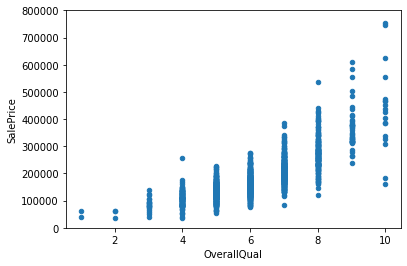

In [24]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### scatter plot 보다는 boxplot 으로 보는 게 좋을 듯...
- df.polt.box() 도 있지만 받아들이는 데이터의 형태가 다름 (dataframe manual 참고)

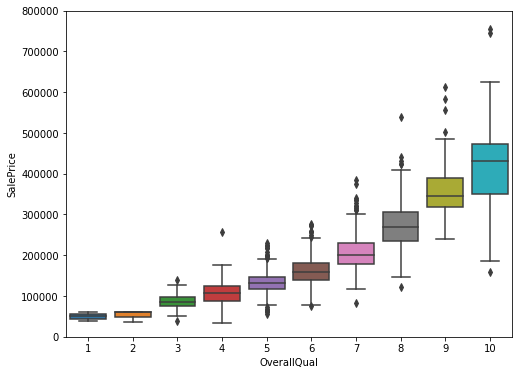

In [25]:
# f, ax = plt.subplots(figsize=(8, 6))
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

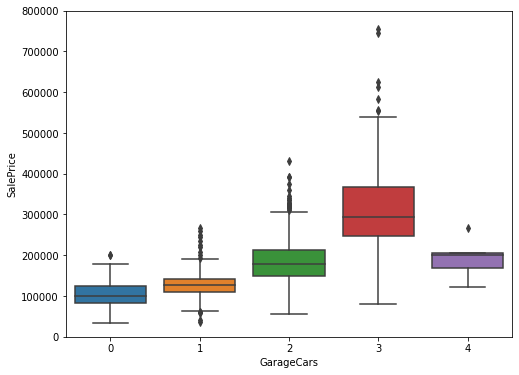

In [26]:
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) # axis=0 은 위아래로 추가.
data.head()
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

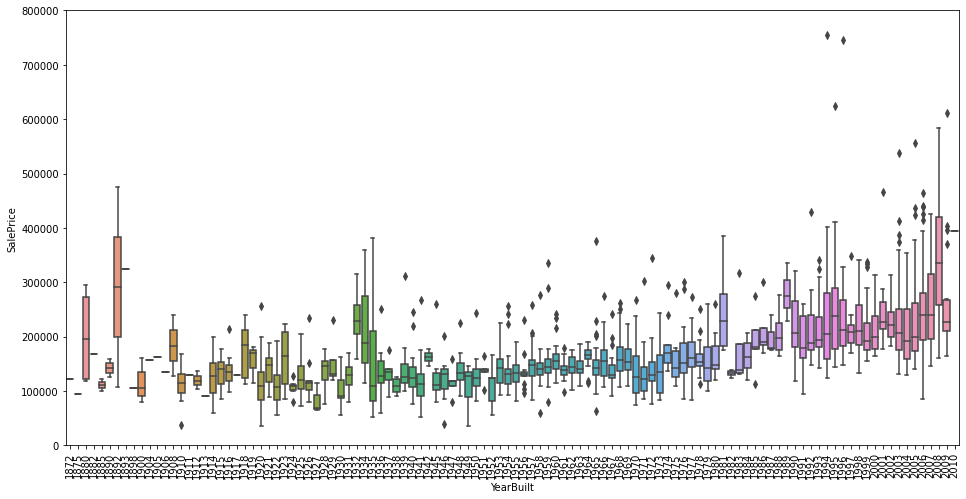

In [27]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

약한 관련성이 있으며 최근의 주택 가격이 높다. 인플레이션이 반영된 가격일 수도 있다.
유용한 특성을 선택하는 것이 문제이다. 이러한 특성 선택을 임의로 주관적으로 수행하는 것은 한계가 있다. 객관적인 방법이 필요하다.

### 객관적으로 판단하는 방법으로는...
- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables

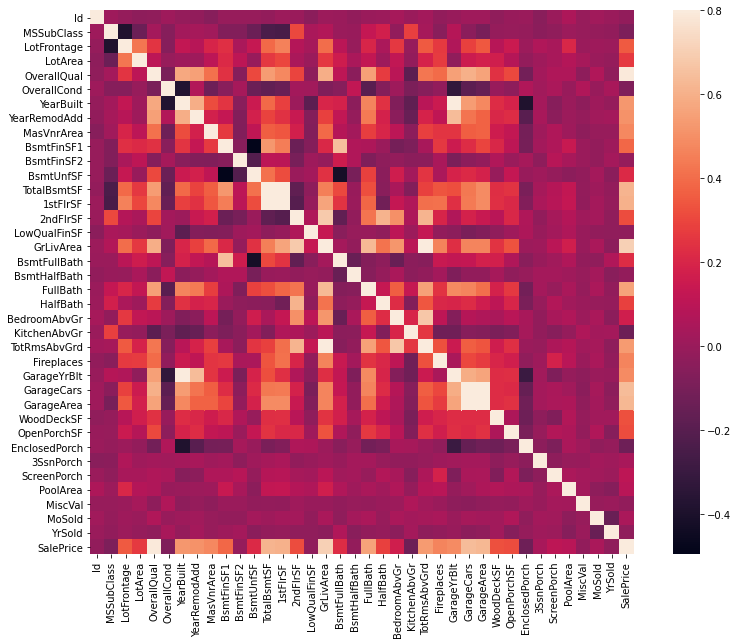

In [28]:
## correlation matrix
# print(df_train.corr())
corrmat = df_train.corr()
# corrmat

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

히트맵 타입의 상관관계 지도는 유용하다. 그림을 보면 'TotalBsmtSF', '1stFlrSF', 'GarageX' 등의 상관관계가 큰 것을 알 수 있다. 경우에 따라서는 두개의 특성이 거의 동일한 정보를 포함하는 것도 있다.

가장 중요한 것은 'SalePrice'와의 상관관계이다. 이를 보면 'GrLivArea', 'TotalBsmtSF', 'OverallQual'가 관련이 많은 것을 알 수 있다. 다른 특성들도 일부 관련이 있으므로 무시할 수 없다.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

In [29]:
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [30]:
corrmat.sort_values(by='SalePrice', ascending=False).T.tail()# just for checking

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
PoolArea,0.092404,0.065166,0.170205,0.020934,0.061047,0.126053,0.131525,0.049604,0.083757,0.004950,0.005829,-0.014501,0.011723,0.095074,0.140491,0.206167,0.073378,0.081487,0.060762,0.022381,0.077672,0.067616,-0.035092,0.070703,0.051307,1.000000,-0.033737,-0.007992,0.041709,0.020025,0.029669,0.057044,0.062157,-0.059689,-0.001985,0.008283,0.054203,-0.014525
MiscVal,-0.021190,-0.031406,-0.002416,-0.043080,-0.027400,-0.018479,-0.021096,-0.014290,0.024763,-0.034383,-0.010286,-0.032417,-0.029815,0.001409,0.003571,0.003368,-0.009551,0.016197,-0.018584,0.001290,0.038068,-0.023047,-0.023837,0.007767,0.031946,0.029669,-0.006495,0.000354,0.004940,-0.007367,1.000000,-0.006242,-0.003793,0.004906,0.068777,-0.007683,0.018361,0.062341
MoSold,0.046432,0.070815,0.050240,0.040522,0.027974,0.013196,0.031372,0.055872,0.036907,0.012398,0.021490,0.005337,-0.005965,0.046357,-0.015727,0.011200,0.021011,0.035164,0.071255,-0.009050,0.001205,-0.025361,0.034888,0.046544,0.023217,-0.033737,1.000000,0.029474,-0.015211,0.032873,-0.006495,0.021172,-0.022174,-0.145721,-0.003511,-0.013585,-0.028887,0.026589
YrSold,-0.028923,-0.027347,-0.036526,-0.039117,-0.027378,-0.014969,-0.013604,-0.019669,-0.034516,-0.013618,0.035743,-0.001014,-0.008201,-0.024096,0.014359,0.007450,0.022270,-0.028700,-0.057619,-0.010269,-0.014261,0.067049,-0.041258,-0.036014,0.010694,-0.059689,-0.145721,0.018645,0.031706,-0.046524,0.004906,0.000712,-0.028921,1.000000,0.043950,-0.021407,-0.009916,0.031687
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,0.386420,0.351799,0.324413,0.319334,0.315856,0.284108,0.263843,0.227122,0.214479,0.168213,0.111447,0.092404,0.046432,0.044584,-0.011378,-0.016844,-0.021190,-0.021917,-0.025606,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907


In [31]:
# saleprice correlation matrix
# # df.nlargest(): Get the rows of a DataFrame sorted by the n largest values of columns.
k = 5      #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')
cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


In [32]:
cols = cols['SalePrice']; cols

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [33]:
cols = cols.index; cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [34]:
df_train[cols].values

array([[208500,      7,   1710,      2,    548],
       [181500,      6,   1262,      2,    460],
       [223500,      7,   1786,      2,    608],
       ...,
       [266500,      7,   2340,      1,    252],
       [142125,      5,   1078,      1,    240],
       [147500,      5,   1256,      1,    276]])

In [35]:
df_train[cols].corr()   # dataframe

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000


In [36]:
cm = df_train[cols].corr().values

In [37]:
# same as the above (numpy 에도 동일 기능 함수가 있음)
cm2 = np.corrcoef(df_train[cols].values.T) # Return correlation coefficients.
                                          # Each row of x represents a variable, and 
                                          # each column a single observation of variables
cm2

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ]])

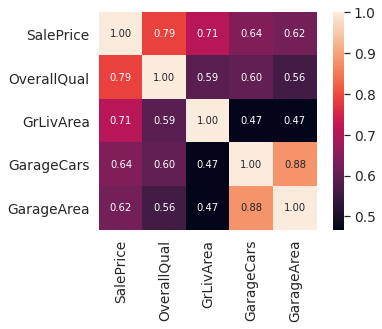

In [38]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
        fmt='.2f', annot_kws={'size': 10}, 
        yticklabels=cols.values, xticklabels=cols.values)
plt.show()

상관관계가 높은 순으로 정렬했다.

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'은 'SalePrice'와 상관관계가 크다.
* 'GarageCars' and 'GarageArea' 특성은 같은 의미를 갖는 것으로 보인다 (상관관계 0.88).
* 'TotalBsmtSF' and '1stFloor' 도 상관관계가 크다. (0.82)
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea' 도 상관관계가 크다(0.83).

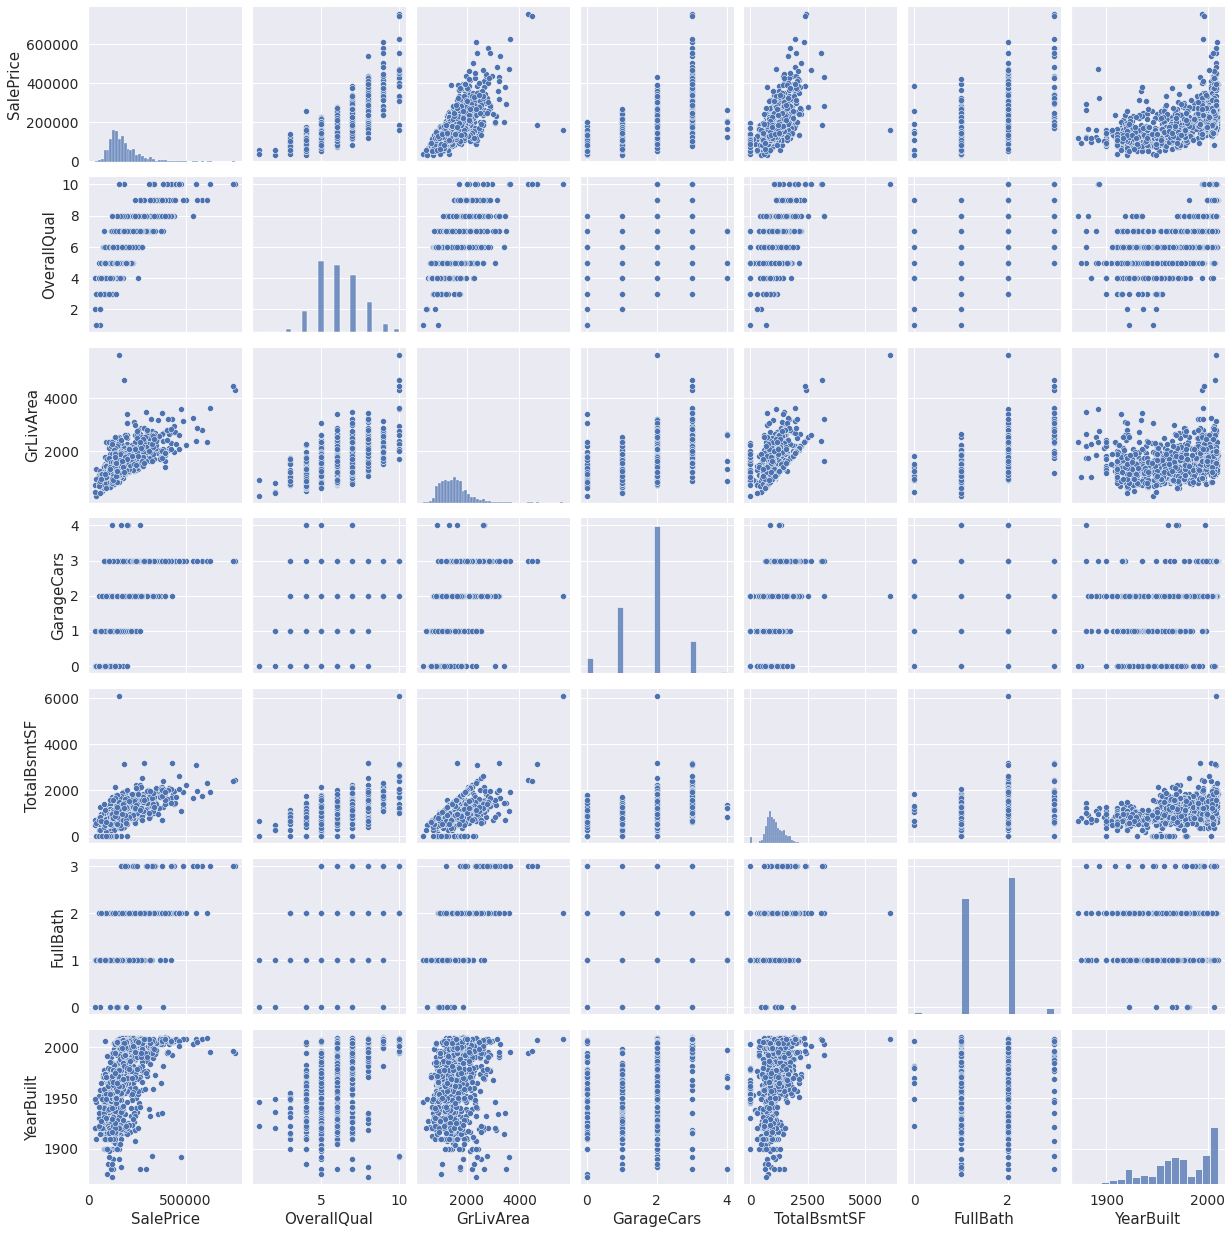

In [39]:
# 산포도
# sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
  'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

'TotalBsmtSF' and 'GrLiveArea'이 의미 있게 보인다. 산포도를 보면 직선의 한 쪽에 집중해서 나타나는 것을 알 수 있다. 지하실의 크기는 1층의 면적과 거의 같거나 작다.

'YearBuilt'도 약한 지수함수 형태를 보인다. 가격이 계속 오르고 있다.

# 결측치 처리

결측 패턴이 산발적인가, 규칙적인가?

In [40]:
# missing data (아래 코드는 결측치 통계를 찾는 코드이다.)
total = df_train.isnull().sum().sort_values(ascending=False)
total.head(10)

# percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### 분석 결과
- 결측률이 15% 이상이면 이 특성은 제외하고 분석하는 것이 타당하다.('PoolQC', 'MiscFeature', 'Alley' 등) 이러한 데이터의 중요도도 생각해봐야 한다. 

- 'Garage*X*'의 결측치 비율이 같고, 중복성이 있다.'Bsmt*X*' 특성도 마찬가지

- 'MasVnrArea' and 'MasVnrType'는'YearBuilt'나 'OverallQual' 와 상관과계가 크므로 중복성이 있어 제외 가능하다.

- 'Electrical'는 한 값만 결측이므로 해당 샘플만 제거한다.

- 'Electrical' 외의 결측치를 관찰한 결과 모두 특성에서 제외하기로 한다. 

In [41]:
df_train_org = df_train.copy()    # 만일을 위해서 (나중에 비교해 볼 필요가 있을때)

In [42]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max()            # nul 합의 최고가 0 인지 확인

0

In [43]:
df_train.shape    # 18 개 columns , 1 row 제거

(1459, 63)

# 특이값(outlier)

중요한 의미나 정보를 포함할 수 있다. 표준편차나 산포도에서 찾을 수 있다.

표준 정규화를 하여 비교한다. 상위 영역에 7 이상의 표준편차 차이가 있는 것을 알 수 있다.

In [44]:
# saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
# saleprice_scaled

saleprice_scaled = StandardScaler().fit_transform(np.array(df_train['SalePrice']).reshape(-1,1))
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [45]:
saleprice_scaled[:,0]

array([ 0.34704187,  0.0071701 ,  0.53585953, ...,  1.07713679,
       -0.48847623, -0.42081658])

In [46]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

# argsort() : sorting 후 순서가 index 로 나타남
# >>> x = np.array([3, 1, 2])
# >>> np.argsort(x)
# array([1, 2, 0])

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


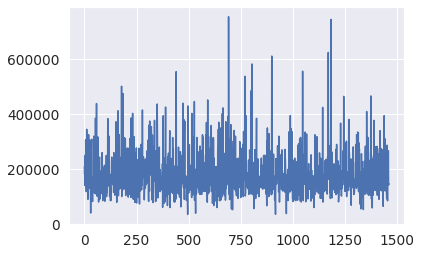

In [47]:
plt.plot(df_train['SalePrice'])   # if not shown, x-axis is default len(y)

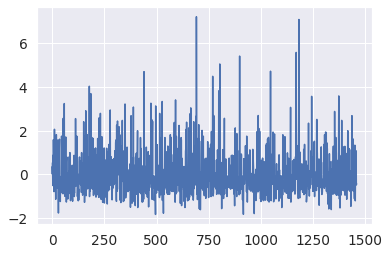

In [48]:
plt.plot(saleprice_scaled)

### Bivariate 분석

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


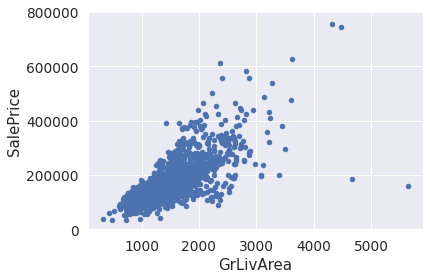

In [49]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

우측의 두 점은 트렌드를 따르지 않는 값으로 여기서는 삭제한다. 상위의 두 점은 7~ 값을 갖는 케이스인데 트렌드를 따르므로 삭제하지 않는다.

In [50]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,5644,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,2,1418,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,2260,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,3,884,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750


In [51]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


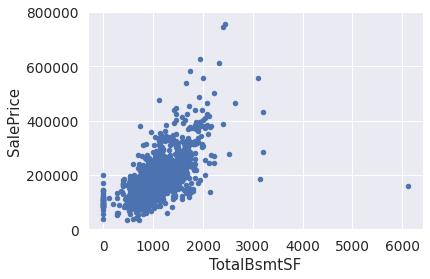

In [98]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

우측의 이상치가 있어 보이지만 그대로 둔다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


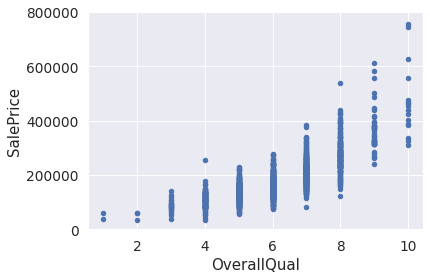

In [53]:
#bivariate analysis saleprice/overallqual
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# 다음 단계

점검할 사항:

- 정규성
- 등분산성
- 선형관계성
- 상호 연관된 오류의 부재

### In the search for normality

- 히스토그램: Kurtosis and skewness (첨도 및 왜도) 점검
- Normal probability plot

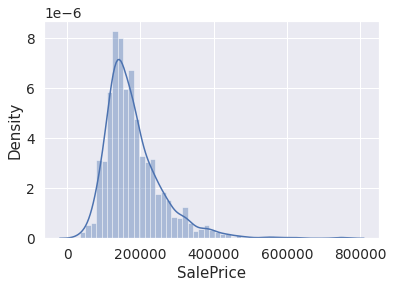

<Figure size 432x288 with 0 Axes>

In [54]:
# 히스토그램과 정규분포 플롯
sns.distplot(df_train['SalePrice']);  #  plot the estimated PDF over the data.
# sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
# res = stats.probplot(df_train['SalePrice'], plot=plt)
# stats.probplot(): Generates a probability plot of sample data against the quantiles 
# of a specified theoretical distribution (the normal distribution by default). 
# probplot optionally calculates a best-fit line for the data and plots the results 
# using Matplotlib or a given plot function.

'SalePrice'는 정규분포는 아니다. 정점(peakedness)이 존재하고 양의 왜곡(positive skewness)를 보인다. 양의 왜곡에는 로그 변환을 하면 도움이 된다. 

In [55]:
# 로그변환
df_train['SalePrice'] = np.log(df_train['SalePrice'])

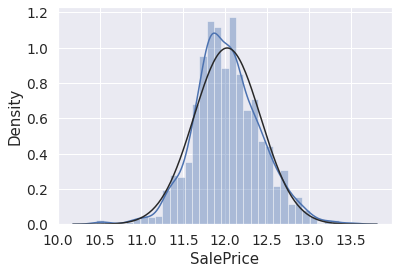

<Figure size 432x288 with 0 Axes>

In [56]:
sns.distplot(df_train['SalePrice'], fit=norm);
# sns.distplot(df_train['SalePrice']);
fig = plt.figure()
# res = stats.probplot(df_train['SalePrice'], plot=plt)

'GrLivArea'에 대해서 알아보겠다.

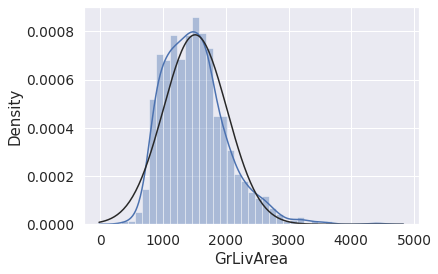

<Figure size 432x288 with 0 Axes>

In [57]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
# res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [58]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

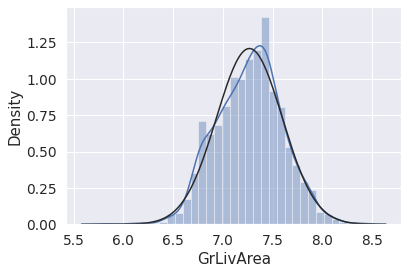

<Figure size 432x288 with 0 Axes>

In [59]:
# 로그 변환 후 플롯
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
# res = stats.probplot(df_train['GrLivArea'], plot=plt)

TotalBsmtSF 변수에 대한 그래프

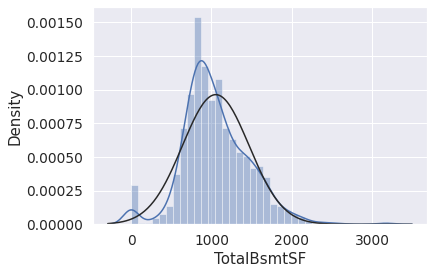

<Figure size 432x288 with 0 Axes>

In [60]:
# histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
# res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [61]:
# pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

값이 0인 것은 로그 변환을 할 수 없다. 0인 경우는 '지하실 없음' 등으로 표현하고 0 이상인 값에 대해서만 로그 변환을 할 수 있다.

In [62]:
# 별도의 컬럼 추가
# area>0 이면 1, for area==0 이면 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,1457
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,1457
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,1457
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,1457
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,1457


In [63]:
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,1


In [64]:
df_train.HasBsmt

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBsmt, Length: 1457, dtype: int64

In [65]:
# 양수인 경우 로그 변환
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

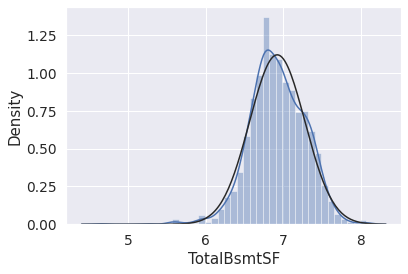

<Figure size 432x288 with 0 Axes>

In [66]:
# 히스토그램
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
# res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### homoscedasticity (동질학)
- meaning "same variance"
- 산포도로 확인할 수 있다.
- see an example in https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

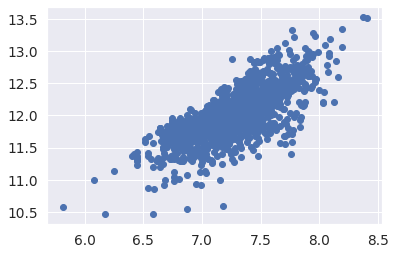

In [67]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

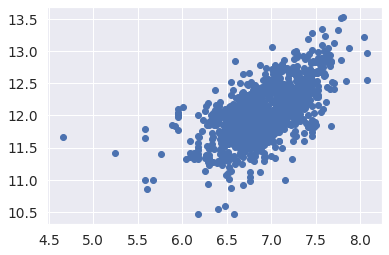

In [68]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

# 위의 처리 이전과 이후를 비교해 보기 위해

In [69]:
df_train_org.shape, df_train.shape

((1460, 81), (1457, 64))

In [117]:
###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = df_train_org.copy()
corrmat = df.corr()
corrmat.sort_values(by='SalePrice', ascending=False).T.tail()

cols = corrmat.nlargest(5, 'SalePrice') 
df2 = df[cols.index]
X, y = df2.values[:,1:], df2.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Before the data cleaning: ", model.score(X_test, y_test))

###
df = df_train.copy()
corrmat = df.corr()
cols = corrmat.nlargest(5, 'SalePrice') 
df3 = df[cols.index]
X, y = df3.values[:,1:], df3.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("After the data cleaning: ", model.score(X_test, y_test))

###
df = df_train.copy()
corrmat = df.corr()
cols = corrmat.nlargest(5, 'SalePrice') 
df3 = df[cols.index]
X, y = df3.values[:,1:], df3.values[:,0]
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("After the data cleaning and scaling: ", model.score(X_test, y_test))

Before the data cleaning:  0.7233105446548647
After the data cleaning:  0.7553162672114541
After the data cleaning and scaling:  0.7439971654272717


In [71]:
cols.shape

(5, 36)

# 모두 사용:
- int64 타입이 아닌 컬럼들은 모두 LabelEncoding() or OneHotEncoding()

In [72]:
df = df_train.copy()
df.columns, df.shape

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
        'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
        'SaleCondition', 'SalePrice', 'HasBsmt'],
       dtype='object'), (1457, 6

In [73]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,6.752270,GasA,Ex,Y,SBrkr,856,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,7.140453,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,6.824374,GasA,Ex,Y,SBrkr,920,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,6.628041,GasA,Gd,Y,SBrkr,961,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,7.043160,GasA,Ex,Y,SBrkr,1145,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,1


In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
print(type(df.dtypes))    # series
len(df.dtypes)

<class 'pandas.core.series.Series'>


64

In [75]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
HasBsmt            int64
Length: 64, dtype: object

In [76]:
# string 인 column 은 모두 LabelEncoder
for i in range(1, len(df.dtypes)-1):
    if df.dtypes[i] != 'int64':
        df.iloc[:,i] = LabelEncoder().fit_transform(df.iloc[:,i])

In [77]:
(df.dtypes != 'int64').sum()

0

In [78]:
df.dtypes

Id               int64
MSSubClass       int64
MSZoning         int64
LotArea          int64
Street           int64
                 ...  
YrSold           int64
SaleType         int64
SaleCondition    int64
SalePrice        int64
HasBsmt          int64
Length: 64, dtype: object

In [79]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,2,4,2,706,0,150,179,1,0,1,4,856,854,0,531,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,411,1
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,3,4,1,978,0,284,441,1,0,1,4,1262,0,0,259,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,339,1
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,2,4,2,486,0,434,214,1,0,1,4,920,866,0,570,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,441,1
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,3,4,0,216,0,540,117,1,2,1,4,961,756,0,536,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,194,1
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,2,4,2,655,0,490,370,1,0,1,4,1145,1053,0,734,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,493,1


In [80]:
X, y = df.values[:,1:-1], df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Using all the featurs: ", model.score(X_test, y_test))

Using all the featurs:  0.6990364404594327


In [81]:
for i in range(1, len(df.dtypes)-1):
    if df.dtypes[i] != 'int64':
        df.iloc[:,i] = OneHotEncoder().fit_transform(df.iloc[:,i])

X, y = df.values[:,1:-1], df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Using all the featurs: ", model.score(X_test, y_test))

Using all the featurs:  0.3847522127760955


# 연습

### Exercise for skewness, kurtosis

0   -0.036891
dtype: float64 0    0.037766
dtype: float64


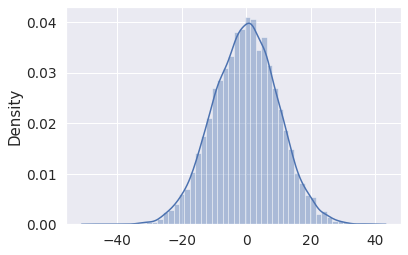

In [82]:
sample_df = pd.DataFrame(10*np.random.randn(10000,1))
sample_df.head()
print(sample_df.skew(), sample_df.kurtosis())   # excess kurtosis = kurtosis -3
sns.distplot(sample_df, color='b')

- kurtosis(첨도): b=3 정규분포, b>3 뾰족함, b<3 평평함
- skewness(왜도): a=0 정규분포, a>0 좌측치우침, a<0 우측치우침
- excess kurtosis (초과왜도): defined as kurtosis -3
- Note: The only data values (observed or observable) that contribute to kurtosis in 
  any meaningful way are those outside the region of the peak; i.e., the outliers. 
  Therefore, kurtosis measures outliers only; it measures nothing about the "peak".

### Python print 방법 연습

In [83]:
# 1. 포맷 문자열 (f-문자열)
table = {'Sjoerd': 4127, 'Jack': 4098, 'Dcab': 7678}
# table.items()              # dict.items(), dict.keys(), dict.values()
for name, phone in table.items():
    print(f'{name:7s} ==> {phone:7d}')

Sjoerd  ==>    4127
Jack    ==>    4098
Dcab    ==>    7678


In [84]:
# 2. 문자열 format 메쏘드
print('The story of {1}, {0}, and {other}.'.format('Bill', 'Manfred', other='Georg'))

The story of Manfred, Bill, and Georg.


In [85]:
# 3. 예전의 문자열 포맷팅 (use %) - sprintf() 스타일
print('%(language)s has %(number)03d quote types.' % {'language': "Python", "number": 2})

Python has 002 quote types.


### Correlation
- np.corrcoef() and df.corr()
- df.corr() is NaN tolerant whereas np.corrcoef is not.

In [86]:
a = np.array([1, 2, 3, 4, 5, np.nan])
b = np.array([2, 3, 4, 5.25, np.nan, 100])
print(np.corrcoef(a,b))
# ----
print(np.ma.masked_invalid(a),np.ma.masked_invalid(b))
np.ma.corrcoef(np.ma.masked_invalid(a), np.ma.masked_invalid(b))

[[nan nan]
 [nan nan]]
[1.0 2.0 3.0 4.0 5.0 --] [2.0 3.0 4.0 5.25 -- 100.0]


masked_array(
  data=[[1.0, 0.99838143945703],
        [0.99838143945703, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [87]:
a = np.array([1, 2, 3, 4, 5, np.nan])
b = np.array([2, 3, 4, 5.25, np.nan, 100])
df = pd.concat([pd.DataFrame(a), pd.DataFrame(b)], axis=1)
df.corr()

,0,0
0,1.000000,0.998381
0,0.998381,1.000000


### exercise 

In [88]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
print(pd.isna(array))
print(pd.isna(array[0]))

df = pd.DataFrame([['ant', 'bee', 'cat'], ['dog', None, 'fly']],
                 columns=['A','B','C']); df

df['A'] # column name 0 (feature), not a row index (index)

df[['A','B']]

df[:1].values == df.iloc[:1].values

pd.isna(df)

[[False  True False]
 [False False  True]]
[False  True False]


,A,B,C
0,False,False,False
1,False,True,False


In [89]:
# exercise: newaxis (축을 새로 추가하기)
import numpy as np
x = np.array([1,2,3,4])
print(x, x.shape)
x[:,np.newaxis]
x.reshape(4,1)  # 동일한 효과
x[np.newaxis,:]
x.reshape(1,4)
print(x[:,np.newaxis], x[:,np.newaxis].shape)
print(x[np.newaxis,:], x[np.newaxis,:].shape)
print(x.reshape(-1,1), x.reshape(-1,1).shape)
print(x.reshape(1,-1), x.reshape(1,-1).shape)

[1 2 3 4] (4,)
[[1]
 [2]
 [3]
 [4]] (4, 1)
[[1 2 3 4]] (1, 4)
[[1]
 [2]
 [3]
 [4]] (4, 1)
[[1 2 3 4]] (1, 4)


In [90]:
# for your reference
ser = df_train['SalePrice']
ser_arr = np.array(df_train['SalePrice'])
ser_arr_resh = ser_arr.reshape(-1,1)
ser_newax = ser[:, np.newaxis]

print(type(ser), type(ser_arr), type(ser_arr_resh), type(ser_newax))
print(ser.shape, ser_arr.shape, ser_arr_resh.shape, ser_newax.shape)
print('****')
print("array = ", '\n', ser_arr)
print("reshaped array = ", '\n', ser_arr_resh)
print("newaxised array = ", '\n', ser_newax )
###
print(ser.shape, ser_arr_resh.shape, ser_newax.shape)
print('----')
print(type(df_train['SalePrice'][:,np.newaxis]))    # array
print(df_train['SalePrice'][:,np.newaxis])
print(df_train['SalePrice'][:,np.newaxis].shape)
df_train['SalePrice'].values.reshape(-1,1).shape

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1457,) (1457,) (1457, 1) (1457, 1)
****
array =  
 [12.24769432 12.10901093 12.31716669 ... 12.49312952 11.86446223
 11.90158345]
reshaped array =  
 [[12.24769432]
 [12.10901093]
 [12.31716669]
 ...
 [12.49312952]
 [11.86446223]
 [11.90158345]]
newaxised array =  
 [[12.24769432]
 [12.10901093]
 [12.31716669]
 ...
 [12.49312952]
 [11.86446223]
 [11.90158345]]
(1457,) (1457, 1) (1457, 1)
----
<class 'numpy.ndarray'>
[[12.24769432]
 [12.10901093]
 [12.31716669]
 ...
 [12.49312952]
 [11.86446223]
 [11.90158345]]
(1457, 1)


(1457, 1)

- Missing value handling

In [91]:
df_train.isna().sum()
df_train.count()  # Count non-NA cells for each column or row
df_train.count().head()

Id            1457
MSSubClass    1457
MSZoning      1457
LotArea       1457
Street        1457
dtype: int64